### 1. Read the entire dataset of Danish housing sales data, from Boliga, into a Pandas DataFrame. Use the read_csv function from the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json, csv

In [6]:
housing = pd.read_csv("all.csv")

In [3]:
housing.head()

In [4]:
len(housing)

1385309

In [5]:
housing.shape

(1385309, 11)

### 2. Geocode the the entire dataset of Danish housing sales data. Add two new columns to the DataFrame, one for latitude (lat) and one for longitude (lon) coordinates per address. Do the geocoding with help of the OSM dataset stored in a file as discussed in class. Save that DataFrame to a CSV file with the help of pandas'

In [6]:
"""from osmread import parse_file, Node


def decode_node_to_csv():
    for entry in parse_file('./dkosmdata/denmark-latest.osm'):
        if (isinstance(entry, Node) and 
            'addr:street' in entry.tags and 
            'addr:postcode' in entry.tags and 
            'addr:housenumber' in entry.tags):

            yield entry

dicts ={}
arrcity = []
arrzip = []
arrstreet = []
lat = []
lon =[]

for idx, decoded_node in enumerate(decode_node_to_csv()):
    #if idx > 1000000:
    #    break    
   
    for a, b in decoded_node[5].items():
        
        if a == 'addr:city':
            city = b            
        if a == 'addr:housenumber':
            number = b                
        if a == 'addr:postcode':
            zipcode = b            
        if a == 'addr:street':
            street = b, number            
    
    arrcity.append(city)
    arrzip.append(zipcode)
    arrstreet.append(street)
    lon.append(decoded_node[6])
    lat.append(decoded_node[7])
    #print(city, zipcode, street, decoded_node[6], decoded_node[7])               
        
dicts = {"city":arrcity, "zipcode": arrzip, "street": arrstreet, "longitude":lon ,"latitude":lat}
       
        
  """

'from osmread import parse_file, Node\n\n\ndef decode_node_to_csv():\n    for entry in parse_file(\'./dkosmdata/denmark-latest.osm\'):\n        if (isinstance(entry, Node) and \n            \'addr:street\' in entry.tags and \n            \'addr:postcode\' in entry.tags and \n            \'addr:housenumber\' in entry.tags):\n\n            yield entry\n\ndicts ={}\narrcity = []\narrzip = []\narrstreet = []\nlat = []\nlon =[]\n\nfor idx, decoded_node in enumerate(decode_node_to_csv()):\n    #if idx > 1000000:\n    #    break    \n   \n    for a, b in decoded_node[5].items():\n        \n        if a == \'addr:city\':\n            city = b            \n        if a == \'addr:housenumber\':\n            number = b                \n        if a == \'addr:postcode\':\n            zipcode = b            \n        if a == \'addr:street\':\n            street = b, number            \n    \n    arrcity.append(city)\n    arrzip.append(zipcode)\n    arrstreet.append(street)\n    lon.append(decoded_n

In [7]:
# saving the dicts containing the 4 lists into pandas dataframe, and save it as csv file
#df = pd.DataFrame(dicts)      
#df.to_csv('newpostcodedenmark2.csv', mode='a') 

#### Reading the newly created csv file and Geocoding the original dataset (housing). The following steps explains the data cleaning and preparing process

In [6]:
newDataframe = pd.read_csv("newpostcodedenmark2.csv", index_col=False)

In [7]:
arrData = np.array(newDataframe.street)

In [8]:
def cleanstreet(street):
    #result = street.find('(') 
    street = street.replace('\'','')
    street = street.replace('(','')
    street = street.replace(')','')
    street = street.split(",")
        
    #int(street)
    street = street[0] + "" + str(street[1])
    return street

#cleanstreet(arrData[0])                          
                            
cleanstreets = []
for data in arrData:
    cleanstreets.append(cleanstreet(data))
    
newDataframe['street'] = cleanstreets
print("done")

done


In [9]:
newDataframe.head()

,Unnamed: 0,city,zipcode,street,longitude,latitude
0,0,Esbjerg V,6710,Tarphagevej 6,8.411125,55.489442
1,1,København Ø,2100,Kroghsgade 5,12.574441,55.696509
2,2,Lynge,3540,Nymøllevej 5,12.304332,55.823018
3,3,Lynge,1560,Kalvebod Brygge 57,12.562384,55.662963
4,4,Lynge,1207,Hyskenstræde 9,12.576875,55.677942


In [10]:
housing.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct
0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0
1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0
2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0
3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0
4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0


In [5]:
"""
import re
from osmread import parse_file, Node
from collections import defaultdict

# creation of this datalist to csv will take 3 days
addresslist = []
print("data loaded")
for index, house in housing.iterrows():
    address = house['address'].split(",")[0] + " " + house['zip_code'].split(" ")[0]
    addresslist.append(address)
print("first part done")
print(addresslist[0])

housing['latitude'] = ''
housing['longitude'] = ''
#print(housing.columns)
i = 0
for index, df in newDataframe.iterrows():
    #print(index)
    i += 1
    #if index < 1000:
    try:
        addresslistindex = addresslist.index(re.sub(r'[\W_]+', ' ', df['street'])[1:-1] + " " + str(df["zipcode"]))
        housing.loc[addresslistindex, 'latitude'] = df['latitude']
        housing.loc[addresslistindex, 'longitude'] = df['longitude']
        print(i)
        print(housing.head())
    except ValueError:
        #print("fail")
        None
        
print("done")
housing.to_csv('./finallist.csv')
"""

'\nimport re\nfrom osmread import parse_file, Node\nfrom collections import defaultdict\n\n# creation of this datalist to csv will take 3 days\naddresslist = []\nprint("data loaded")\nfor index, house in housing.iterrows():\n    address = house[\'address\'].split(",")[0] + " " + house[\'zip_code\'].split(" ")[0]\n    addresslist.append(address)\nprint("first part done")\nprint(addresslist[0])\n\nhousing[\'latitude\'] = \'\'\nhousing[\'longitude\'] = \'\'\n#print(housing.columns)\ni = 0\nfor index, df in newDataframe.iterrows():\n    #print(index)\n    i += 1\n    #if index < 1000:\n    try:\n        addresslistindex = addresslist.index(re.sub(r\'[\\W_]+\', \' \', df[\'street\'])[1:-1] + " " + str(df["zipcode"]))\n        housing.loc[addresslistindex, \'latitude\'] = df[\'latitude\']\n        housing.loc[addresslistindex, \'longitude\'] = df[\'longitude\']\n        print(i)\n        print(housing.head())\n    except ValueError:\n        #print("fail")\n        None\n        \nprint("don

### 3. Convert all sales dates in the dataset into proper datetime objects, see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html.

In [2]:
dataframe = pd.read_csv("finallist.csv", index_col=False)

In [3]:
dataframe.head()

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude
0,0,"Ved Volden 5, 5. TV",1425 København K,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629
1,1,"Rådhusstræde 4C, 1",1466 København K,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689
2,2,"Store Kongensgade 112A, 3",1264 København K,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441
3,3,"Amaliegade 13G, 2",1256 København K,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287
4,4,"Borgergade 144, 3. TH",1300 København K,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744


In [4]:
newdate = pd.to_datetime(dataframe.sell_date)

In [5]:
dataframe['sell_date'] = newdate

In [6]:
dataframe.head()

,Unnamed: 0,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude
0,0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629
1,1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689
2,2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441
3,3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287
4,4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-10-05,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744


### 4. Compute the average price per square meter for the years 1992 and 2016 respectively for the city centers of Copenhagen (zip code 1050-1049), Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000). Create two new DataFrames, one for the year 1992 and one for the year 2016, which contain the respective zip codes and the average price per square meter corresponding to the aforementioned cities. Let the DataFrames be sorted by ascending prices.

In [7]:
dataframe['sell_date'].values

array(['2017-05-23T00:00:00.000000000', '2017-05-18T00:00:00.000000000',
       '2017-05-15T00:00:00.000000000', ...,
       '1992-01-14T00:00:00.000000000', '1992-08-01T00:00:00.000000000',
       '1992-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
dates = pd.DatetimeIndex(dataframe.sell_date)

In [9]:
years = dates.year
dataframe['sell_year'] = years

In [132]:
cph = []
more = []
for a in dataframe.zip_code:
    if a <= '1430 København':
        cph.append(a) 
        more.append(a)

In [11]:
cph_zip = dataframe[(dataframe['zip_code']<='1499 København K')]

In [12]:
cph92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(cph_zip['zip_code']))]
odense92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(['5000 Odense C']))]
aarhus92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(['8000 Aarhus C']))]
aalborg92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(['9000 Aalborg']))]

In [13]:
#average price for 1992 (København, Odense, Aarhus, Aalborg)
print("Average 1992 for Copenhagen:" , round(cph92.price_per_sqm.mean()) ,",Odense: " , round(odense92.price_per_sqm.mean()) , ",Aarhus: " ,round(aarhus92.price_per_sqm.mean()) ,",Aalborg:" ,round(aalborg92.price_per_sqm.mean()))

Average 1992 for Copenhagen: 18623 ,Odense:  5452 ,Aarhus:  7172 ,Aalborg: 4607


In [14]:
cph2016 = dataframe[(dataframe['sell_year']==2016) & (dataframe['zip_code'].isin(cph_zip['zip_code']))]
odense2016 = dataframe[(dataframe['sell_year']==2016) & (dataframe['zip_code'].isin(['5000 Odense C']))]
aarhus2016 = dataframe[(dataframe['sell_year']==2016) & (dataframe['zip_code'].isin(['8000 Aarhus C']))]
aalborg2016 = dataframe[(dataframe['sell_year']==2016) & (dataframe['zip_code'].isin(['9000 Aalborg']))]

In [15]:
#average price for 2016 (København, Odense, Aarhus, Aalborg)
print("Average 2016 for Copenhagen:" , round(cph2016.price_per_sqm.mean()) ,",Odense: " , round(odense2016.price_per_sqm.mean()) , ",Aarhus: " ,round(aarhus2016.price_per_sqm.mean()) ,",Aalborg:" ,round(aalborg2016.price_per_sqm.mean()))

Average 2016 for Copenhagen: 41425 ,Odense:  19378 ,Aarhus:  33120 ,Aalborg: 19624


In [100]:
more = list(dict.fromkeys(cph))

In [134]:
#creating dataframe from list to compare with other dataframe 
more.append('5000 Odense C')
more.append('8000 Aarhus C')
more.append('9000 Aalborg')

zipframe = {'zips':more}

In [135]:
year1992 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(more))]
year2016 = dataframe[(dataframe['sell_year']==2016) & (dataframe['zip_code'].isin(more))]

In [136]:
# creating 2 new dataframe for 1992 and 2016
dframe92 = {"zipcode":year1992.zip_code,"sq_prices": year1992.price_per_sqm}  
dframe16 = {"zipcode":year2016.zip_code,"sq_prices": year2016.price_per_sqm}  
 
df92 = pd.DataFrame(dframe92)  
df16 = pd.DataFrame(dframe16)

#df92.to_csv('data1992.csv', mode='a') 
#df16.to_csv('data2016.csv', mode='a')

### 5. Create, with the help of the pandas module, four new CSV files containing the sales data for the year 1992 for the city centers of Copenhagen (zip code 1050-1499), Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000).

In [137]:
"""
citycenter = []
for index, house in dataframe.iterrows():
    
    zipcode = house['zip_code'].split(" ")[0]
    if zipcode>='1050' and zipcode<='1499':
        citycenter.append(zipcode)
"""

'\ncitycenter = []\nfor index, house in dataframe.iterrows():\n    \n    zipcode = house[\'zip_code\'].split(" ")[0]\n    if zipcode>=\'1050\' and zipcode<=\'1499\':\n        citycenter.append(zipcode)\n'

In [138]:
cph = list(dict.fromkeys(cph))

In [139]:
copenhagen_92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(cph))]

In [140]:
odense_92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(['5000 Odense C']))]

In [141]:
aarhus_92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(['8000 Aarhus C']))]

In [142]:
aalborg_92 = dataframe[(dataframe['sell_year']==1992) & (dataframe['zip_code'].isin(['9000 Aalborg']))]

In [118]:
"""
copenhagen_92.to_csv('cph1992_2.csv') 
odense_92.to_csv('odense1992_2.csv') 
aarhus_92.to_csv('aarhus1992_2.csv') 
aalborg_92.to_csv('aalborg1992_2.csv') 
"""

### 6. Create a 2-dimensional scatter plot, which contains a dot for each location in the dataset of Danish housing sales data. Plot the longitude values on the x- axis and plot the latitude values on the y-axis.

In [149]:
lon = []
lat = []
for lo in dataframe.longitude:
    lon.append(lo)
    
for la in dataframe.latitude:
    lat.append(la)

In [150]:
x = np.array(lon)
y = np.array(lat)

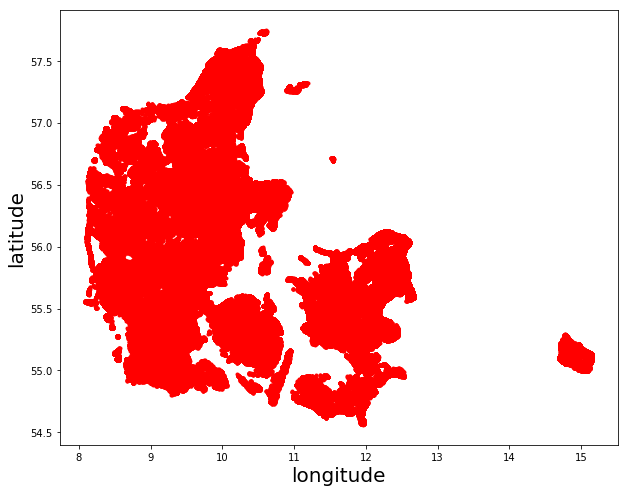

In [151]:
plt.figure(figsize=(10,8))
plt.xlabel('longitude' ,fontsize='20')
plt.ylabel('latitude' ,fontsize='20')
plt.scatter( dataframe['longitude'], dataframe['latitude'],  color='red', marker='.')

### 7. Use the following function, which computes the Haversine Distance (https://en.wikipedia.org/wiki/Haversine_formula) to compute an array of distances (distances) for each for each location in the dataset of Danish housing sales data to the city center of Roskilde (lat=55.65, lon=12.083333).

In [152]:
distances = []
destination = 55.65, 12.083333

In [153]:
import math

def haversine_distance(origin, destination):

    lat_orig, lon_orig = origin
    lat_dest, lon_dest = destination
    radius = 6371

    dlat = math.radians(lat_dest-lat_orig)
    dlon = math.radians(lon_dest-lon_orig)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat_orig)) 
        * math.cos(math.radians(lat_dest)) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [155]:
havdistances = [haversine_distance((55.65, 12.083333), el) for el in dataframe[['longitude', 'latitude']].values]

In [156]:
havdistances

[6074.469482465619,
 6076.680625571392,
 6075.573748924009,
 6075.302591637656,
 6075.767748779031,
 6078.003380656856,
 6074.915557026262,
 6075.066908666062,
 6074.281330216784,
 6076.077274113508,
 6077.362185308722,
 6075.807798074296,
 6075.15891479704,
 6074.2546646650535,
 6076.052185776572,
 6075.961070790079,
 6076.835417238007,
 6076.656069980183,
 6075.994069856367,
 6076.562201113891,
 6077.183123222837,
 6075.504727001754,
 6076.124018874503,
 6075.163706781384,
 6076.675187957141,
 6075.539086110702,
 6074.261662800209,
 nan,
 6075.134500441598,
 6074.222397573842,
 6076.257132944698,
 6077.826501164518,
 6077.166962625008,
 6074.3542002774575,
 6073.249194709247,
 6075.687082555902,
 6077.824660032272,
 6075.933080312453,
 6075.890532001105,
 6075.01613270576,
 6075.633630608657,
 6077.488164608761,
 6073.726477155422,
 6076.40693307722,
 6077.398076174815,
 6077.225396169738,
 6076.8988735964695,
 6074.275326208498,
 6075.285819798171,
 6074.752159520855,
 nan,
 6075.28